In [ ]:
''' Title: Image Classification Model
 BUILD A CONVOLUTIONAL NEURAL NETWORK (CNN) FOR IMAGE CLASSIFICATION USING TENSORFLOW OR PYTORCH.
    Expected Output 
         A FUNCTIONAL MODEL WITH PERFORMANCE EVALUATION ON A TEST DATASET.'''

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Step 1: Define Dataset Paths
train_path = r"C:\Users\Vaishnavi\Desktop\task 3\Training"   # Path to training folder
test_path  = r"C:\Users\Vaishnavi\Desktop\task 3\Testing"      # Path to testing folder

In [ ]:
# Step 2: Data Preprocessing & Augmentation

# Rescale images and apply augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values (0-255 → 0-1)
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2     # 20% data for validation
)
# Only rescaling for test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),        # Resize images to 150x150
    batch_size=32,
    class_mode='categorical',         # Multi-class classification
    subset='training'
)

# Load validation data
val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4480 images belonging to 4 classes.
Found 1120 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [ ]:
# Step 3: Build CNN Model
model = models.Sequential()

# First Convolution Layer
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

# Second Convolution Layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))


# Third Convolution Layer
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))


# Fourth Convolution Layer
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
# Flatten layer converts 2D feature maps into 1D vector
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(128, activation='relu'))
# Dropout to reduce overfitting
model.add(layers.Dropout(0.5))
# Output layer (4 classes)
model.add(layers.Dense(4, activation='softmax'))


model.summary()              # Show model summary

c:\Users\Vaishnavi\Desktop\task 3\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,994,692 (7.61 MB)

 Trainable params: 1,994,692 (7.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Compile Model
model.compile(
    optimizer='adam',         # Adam optimizer
    loss='categorical_crossentropy',       # Loss for multi-class
    metrics=['accuracy']
)

In [ ]:
# Step 5: Train Model
history = model.fit(
    train_generator,
    epochs=25,              # Number of training epochs
    validation_data=val_generator
)

Epoch 1/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 124s 856ms/step - accuracy: 0.5170 - loss: 1.0688 - val_accuracy: 0.7018 - val_loss: 0.7678
Epoch 2/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 111s 790ms/step - accuracy: 0.6821 - loss: 0.7877 - val_accuracy: 0.7402 - val_loss: 0.6251
Epoch 3/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 114s 817ms/step - accuracy: 0.7377 - loss: 0.6708 - val_accuracy: 0.7804 - val_loss: 0.5248
Epoch 4/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 116s 832ms/step - accuracy: 0.7754 - loss: 0.5871 - val_accuracy: 0.8027 - val_loss: 0.4845
Epoch 5/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 117s 836ms/step - accuracy: 0.7955 - loss: 0.5380 - val_accuracy: 0.8125 - val_loss: 0.5014
Epoch 6/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 119s 848ms/step - accuracy: 0.8214 - loss: 0.4719 - val_accuracy: 0.8473 - val_loss: 0.3944
Epoch 7/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 120s 858ms/step - accuracy: 0.8393 - loss: 0.4351 - val_accuracy: 0.8375 - val_loss: 0.4043
Epoch 8/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 133s 795ms/step - accuracy: 0.8558 -

In [ ]:
# Step 6: Evaluate Model
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.8925 - loss: 1.0893
Test Accuracy: 0.8924999833106995


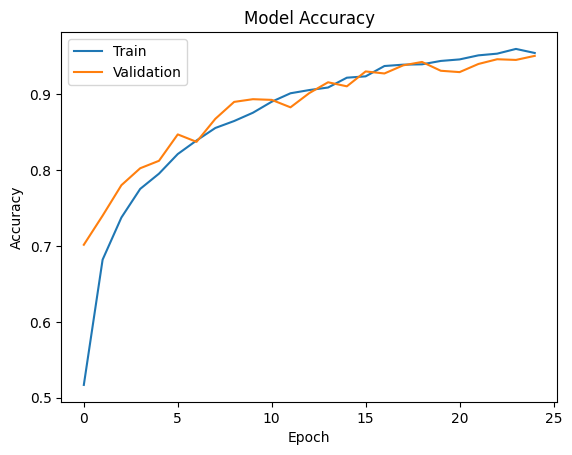

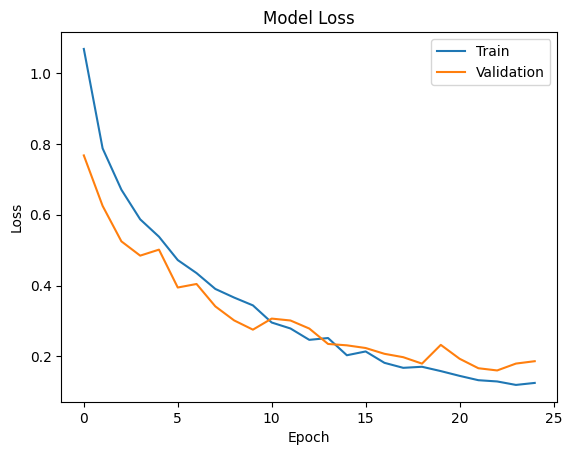

In [ ]:
# Step 7: Plot Accuracy & Loss

# Accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step
              precision    recall  f1-score   support

      glioma       0.98      0.72      0.83       400
  meningioma       0.89      0.87      0.88       400
     notumor       0.81      1.00      0.89       400
   pituitary       0.94      0.98      0.96       400

    accuracy                           0.89      1600
   macro avg       0.90      0.89      0.89      1600
weighted avg       0.90      0.89      0.89      1600



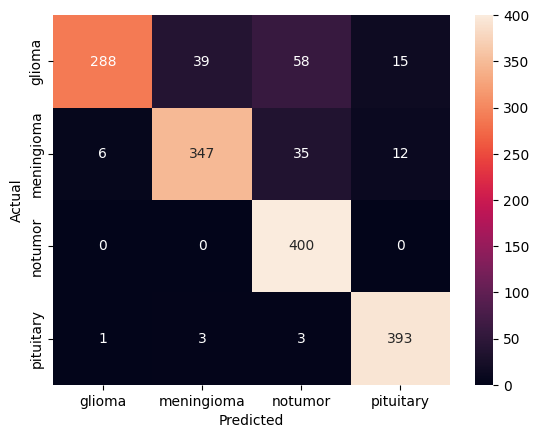

In [ ]:
# Step 8: Classification Report

pred = model.predict(test_generator)    # Predict on test dataset
pred_classes = np.argmax(pred, axis=1)

true_classes = test_generator.classes     # True labels
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# Step 9: Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Final Test Accuracy 
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.8925 - loss: 1.0893
Test Accuracy: 0.8924999833106995


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


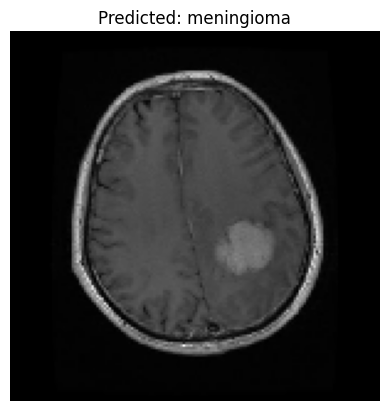

Actual Class: meningioma
Predicted Class: meningioma


In [12]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define class names (must match training order)
class_names = ['glioma', 'meningioma', 'pituitary', 'notumor']

# Path to any class folder (example: Training folder)
dataset_path = r"C:/Users/Vaishnavi/Desktop/task 3/Training"

# Pick random class
random_class = random.choice(os.listdir(dataset_path))
class_folder = os.path.join(dataset_path, random_class)

# Pick random image from that class
random_image = random.choice(os.listdir(class_folder))
img_path = os.path.join(class_folder, random_image)

# Load image
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Show image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

print("Actual Class:", random_class)
print("Predicted Class:", predicted_class)